In [3]:
import importlib
from source.morph import Morph
from source.models import Models
from source.tsmorph import TSmorph
#tsmorph = importlib.import_module('tsmorph-xai.tsmorph.tsmorph')
#TSmorph = tsmorph.TSmorph
import matplotlib.pyplot as plt
import numpy as np
from aeon.datasets import load_classification
from sklearn.preprocessing import LabelEncoder

from aeon.datasets import load_classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

start_color='#61E6AA'
end_color='#5722B1'

### Univariate Example: ECG200

X Shape: (200, 1, 96)


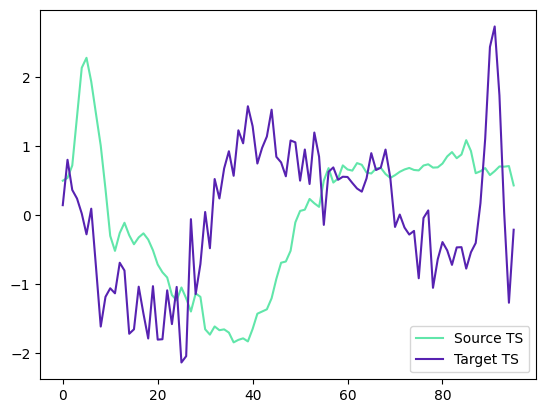

In [18]:
X, y = load_classification("ECG200")
print("X Shape:", X.shape)

S = np.array(X[0])
T = np.array(X[1])

plt.plot(S.T, color=start_color, label='Source TS')
plt.plot(T.T, color=end_color, label='Target TS')
plt.legend()
plt.show()

(10, 1, 96)


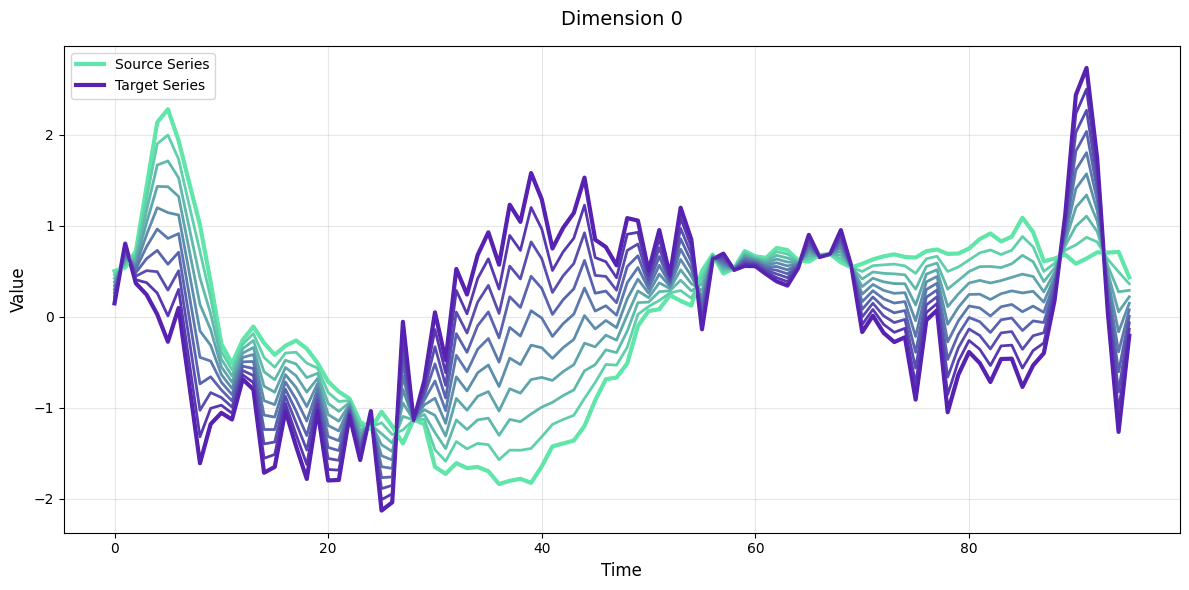

In [19]:
# Create TSmorph object
ts_morph = TSmorph(S, T, granularity=10)

# Perform morphing
morphed_series = ts_morph.transform()

print(morphed_series.shape)
ts_morph.plot_morphed_series(morphed_series)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#lstm = Models('lstm', X_train, y_train)
#lstm.train_lstm()
catch = Models('catch22', X_train, y_train)
catch.train_catch22()
rocket = Models('rocket', X_train, y_train)
rocket.train_rocket()

models = (catch, rocket)

d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sktime.classification.kernel_based import RocketClassifier
rocket = RocketClassifier(num_kernels=10000)  # Adjust the number of kernels as needed
rocket.fit(X_train, y_train)

# Make predictions
y_pred = rocket.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9500


In [22]:
for m in models:
    print(m.model_name, 'accuracy: ')
    pred,_ = m.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(acc)

catch22 accuracy: 
0.825
rocket accuracy: 
0.95


In [9]:
morph = Morph(X_test, y_test, target_class=np.unique(y_test)[0])
morph.get_DTWGlobalBorderline()

res = morph.Binary_MorphingCalculater(models)

100%|██████████| 35/35 [00:14<00:00,  2.39it/s]


In [11]:
print(res['catch22']['metrics'])
print(res['rocket']['metrics'])

{'mean': 0.2888, 'std': 0.15142839892173462}
{'mean': 0.47323529411764703, 'std': 0.14680360206021742}


### Multivariate Example: StandWalkJump

X Shape: (30, 2, 640)


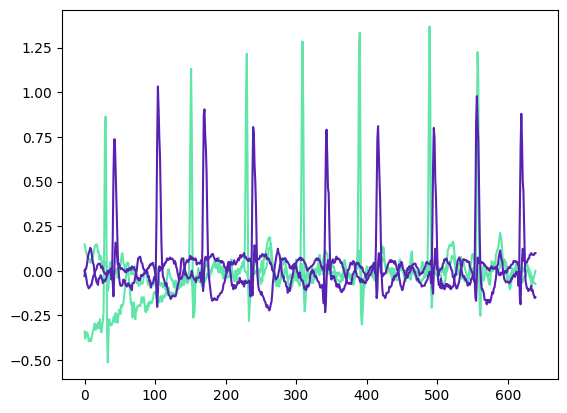

In [4]:
X, y = load_classification('AtrialFibrillation')
le = LabelEncoder()
y = le.fit_transform(y)

print("X Shape:", X.shape)

S = np.array(X[0])
T = np.array(X[5])

plt.plot(S.T, color=start_color, label='Source TS')
plt.plot(T.T, color=end_color, label='Target TS')
plt.show()

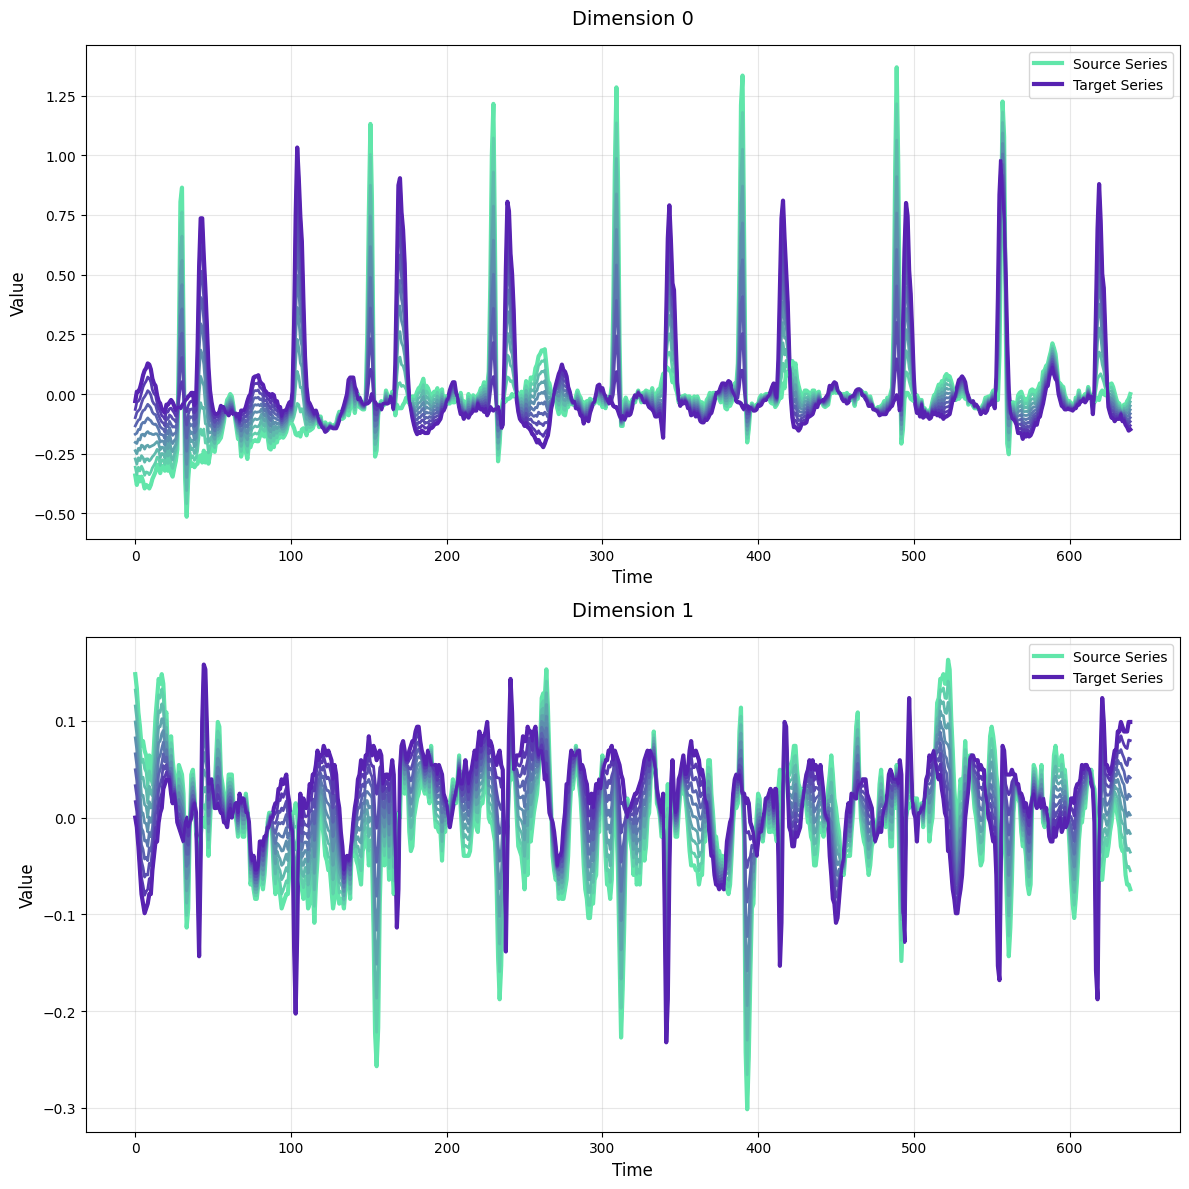

In [5]:
# Create TSmorph object
ts_morph = TSmorph(X[0], X[5], granularity=10)

# Perform morphing
morphed_series = ts_morph.transform()

# Plot the morphed series
ts_morph.plot_morphed_series(morphed_series)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#lstm = Models('lstm', X_train, y_train)
#lstm.train_lstm()
catch = Models('catch22', X_train, y_train)
catch.train_catch22()
#rocket = Models('rocket', X_train, y_train)
#rocket.train_rocket()

models = ([catch])

d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)


In [7]:
for m in models:
    print(m.model_name, 'accuracy: ')
    pred,_ = m.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(acc)

catch22 accuracy: 
0.16666666666666666


In [8]:
morph = Morph(X_test, y_test, target_class=np.unique(y_test)[0])
morph.get_DTWGlobalBorderline()
 
print(morph.borderline_pairs)

{(0, 1): 1.2753110488499986}


In [9]:
res = morph.Binary_MorphingCalculater(models)
res['catch22']['metrics']

100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


{'mean': 0.0, 'std': 0.0}

In [11]:
from sktime.classification.kernel_based import RocketClassifier

# Initialize and train the ROCKET classifier
rocket = RocketClassifier(num_kernels=10000)  # Adjust the number of kernels as needed
rocket.fit(X_train, y_train)

# Make predictions
y_pred = rocket.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.1667
